# **INFO 2950 Project Phase II**

## **Research question(s)**

* In the MLB, are a player's batting statistics indicative of their salary? Which statistics are the most relevant?
* Has the importance of having good batting statistics increased over time? Is there a relationship to salary?
* Can we predict how much a player will make the following season based on their previous batting history?
* Can we determine which current players are the most overpaid for their batting production and which players are the most underpaid?




## **Data collection and cleaning**

_Importing our data:_

We found two csv files from Kaggle's Baseball Databank that we were interested in using. We stored our raw data files Batting.csv and Salaries.csv into dataframes raw_batting and raw_salaries, respectively. raw_batting consists of MLB players' batting statistics while raw_salaries consists of MLB players' salaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raw_batting = pd.read_csv('Batting.csv')
raw_salaries = pd.read_csv('Salaries.csv')

First, we looked at the first few rows of both dataframes. We decided that we wanted to merge these two dataframes into one.

In [3]:
raw_batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


_Cleaning our raw_batting dataframe:_

We started by dropping some of the statistics from the dataframe. Specifically, we got rid of the columns stint, lgID, SB, CS, IBB, SH, and GIDP. We kept the ones that we are interested in and relevant to our questions. For instance, SB stands for 'stolen bases' and this is not a batting statistic so we dropped this column. We drop column IBB 'intentional walks' because the column BB 'walks' already accounts for the IBB statistic.

In [5]:
batting = raw_batting.drop(columns=['stint','lgID','SB','CS','IBB','SH','GIDP'])
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF
0,abercda01,1871,TRO,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,addybo01,1871,RC1,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,4.0,0.0,NaN,NaN
2,allisar01,1871,CL1,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,2.0,5.0,NaN,NaN
3,allisdo01,1871,WS3,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,0.0,2.0,NaN,NaN
4,ansonca01,1871,RC1,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,2.0,1.0,NaN,NaN


Next, we discarded all the batting data prior to 1985 because the salaries data is only available starting then.

In [6]:
batting = batting[batting['yearID'] >= 1985]
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF
62237,aasedo01,1985,BAL,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62238,abregjo01,1985,CHN,6,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
62239,ackerji01,1985,TOR,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62240,adamsri02,1985,SFN,54,121.0,12.0,23.0,3.0,1.0,2.0,10.0,5.0,23.0,1.0,0.0
62241,agostju01,1985,CHA,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we filtered out the null values. We wanted to filter out nulls because otherwise we would get errors when performing our exploratory data analysis.

In [7]:
batting = batting.dropna()
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF
62238,abregjo01,1985,CHN,6,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
62240,adamsri02,1985,SFN,54,121.0,12.0,23.0,3.0,1.0,2.0,10.0,5.0,23.0,1.0,0.0
62241,agostju01,1985,CHA,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62242,aguaylu01,1985,PHI,91,165.0,27.0,46.0,7.0,3.0,6.0,21.0,22.0,26.0,6.0,3.0
62243,aguilri01,1985,NYN,22,36.0,1.0,10.0,2.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0


After get rid of null values, we sorted our data by playerID. 

In [8]:
batting = batting.sort_values(by=['playerID','yearID'])
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF
84637,aardsda01,2004,SFN,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87313,aardsda01,2006,CHN,45,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88691,aardsda01,2007,CHA,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90076,aardsda01,2008,BOS,47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91461,aardsda01,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


While we were reviewing this data we noticed something unsual about our dataframe. Looking at the first row of the previous dataframe, we can see in 2004, player aardsda01 played in 11 games but has 0s across all his batting statistics. Looking at the second row, we see something similar. In 2006, the same player played in 45 games and had 2 at bats, but the rest of his batting statistics are 0s. It didn't make sense for a player to have a lot of games recorded but no at bats but we realized: some of these players in our batting dataframe are pitchers. Since pitchers' salaries are based off their pitching performance, and not their hitting ability, we decided to get rid of all the players who are pitchers.

In [9]:
raw_pitching = pd.read_csv('Pitching.csv')
pitching = raw_pitching[raw_pitching['yearID'] >= 1985]
pitchers = pitching['playerID'].unique()

for pitcher in pitchers:
    batting = batting[batting['playerID']!=pitcher]

We also wanted to get rid of rows where the number of games played is less than or equal to 54. This is because 54 games is a third of the season and we only wanted to take into account players who play at least a third or more of the season.

In [10]:
batting = batting[batting['G']>54]
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF
76627,abbotje01,1998,CHA,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,9.0,28.0,0.0,5.0
79248,abbotje01,2000,CHA,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,21.0,38.0,2.0,1.0
71856,abbotku01,1994,FLO,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,16.0,98.0,5.0,2.0
72887,abbotku01,1995,FLO,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,36.0,110.0,5.0,5.0
74139,abbotku01,1996,FLO,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,22.0,99.0,3.0,0.0


Here, we found and created a column for 'OPS' – on-base plus slugging statistics. We created this variable because it combines most of the batting statistics in the dataframe and we'll use it as the main 'performance metric' for the players.

The equation for OPS is as follows:

OPS = ((H+BB+HBP)/(AB+BB+SF+HBP)) + (((1* 1B)+(2* 2B)+(3* 3B)+(4* HR))/AB)

In [11]:
batting['OPS'] = ((batting['H']+batting['BB']+batting['HBP'])/(batting['AB']+batting['BB']+batting['SF']+batting['HBP'])) + (((1*(batting['H']-batting['2B']-batting['3B']-batting['HR']))+(2*batting['2B'])+(3*batting['3B'])+(4*batting['HR']))/batting['AB'])
batting.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS
76627,abbotje01,1998,CHA,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,9.0,28.0,0.0,5.0,0.790253
79248,abbotje01,2000,CHA,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,21.0,38.0,2.0,1.0,0.738445
71856,abbotku01,1994,FLO,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,16.0,98.0,5.0,2.0,0.684964
72887,abbotku01,1995,FLO,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,36.0,110.0,5.0,5.0,0.769978
74139,abbotku01,1996,FLO,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,22.0,99.0,3.0,0.0,0.735371


Then we started cleaning our raw_salaries dataframe. We started by merging the salaries data to our batting data that we cleaned.

In [12]:
salaries = raw_salaries.drop(columns='lgID').reset_index()
print('The number of rows in batting is {}'.format(len(batting)))
print('The number of rows in salaries is {}'.format(len(salaries)))

batting_salaries = pd.merge(batting, salaries, on=['playerID','yearID','teamID'], how='left')
print('The number of rows in merged dataframe is {}'.format(len(batting_salaries)))
batting_salaries.head()

The number of rows in batting is 10607
The number of rows in salaries is 25575
The number of rows in merged dataframe is 10607


,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS,index,salary
0,abbotje01,1998,CHA,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,9.0,28.0,0.0,5.0,0.790253,10424.0,175000.0
1,abbotje01,2000,CHA,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,21.0,38.0,2.0,1.0,0.738445,12410.0,255000.0
2,abbotku01,1994,FLO,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,16.0,98.0,5.0,2.0,0.684964,6848.0,109000.0
3,abbotku01,1995,FLO,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,36.0,110.0,5.0,5.0,0.769978,7758.0,119000.0
4,abbotku01,1996,FLO,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,22.0,99.0,3.0,0.0,0.735371,8728.0,250000.0


Next, we sorted our new combined dataframe by year. This gave us a timeline to work with our salaries. 

In [13]:
batting_salaries = batting_salaries.sort_values(by='yearID')
batting_salaries.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS,index,salary
10606,zuvelpa01,1985,ATL,81,190.0,16.0,48.0,8.0,1.0,0.0,4.0,16.0,14.0,0.0,0.0,0.615943,NaN,NaN
7022,oberkke01,1985,ATL,134,412.0,30.0,112.0,19.0,4.0,3.0,35.0,51.0,38.0,6.0,2.0,0.718034,16.0,616667.0
7036,obriepe03,1985,TEX,159,573.0,69.0,153.0,34.0,3.0,22.0,92.0,69.0,53.0,1.0,9.0,0.794032,518.0,165000.0
990,boonebo01,1985,CAL,150,460.0,37.0,114.0,17.0,0.0,5.0,55.0,37.0,35.0,3.0,4.0,0.622947,70.0,883000.0
7056,oestero01,1985,CIN,152,526.0,59.0,155.0,26.0,3.0,1.0,34.0,51.0,65.0,0.0,5.0,0.715169,149.0,550000.0


Like with our batting data, we needed to drop the rows with a null value in the salary column to make sure they don't interfere with any calculations we want to do in the future with the data. We also reset the index for clarity. 

In [14]:
batting_salaries = batting_salaries.dropna().reset_index()
batting_salaries.head()

,level_0,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS,index,salary
0,7022,oberkke01,1985,ATL,134,412.0,30.0,112.0,19.0,4.0,3.0,35.0,51.0,38.0,6.0,2.0,0.718034,16.0,616667.0
1,7036,obriepe03,1985,TEX,159,573.0,69.0,153.0,34.0,3.0,22.0,92.0,69.0,53.0,1.0,9.0,0.794032,518.0,165000.0
2,990,boonebo01,1985,CAL,150,460.0,37.0,114.0,17.0,0.0,5.0,55.0,37.0,35.0,3.0,4.0,0.622947,70.0,883000.0
3,7056,oestero01,1985,CIN,152,526.0,59.0,155.0,26.0,3.0,1.0,34.0,51.0,65.0,0.0,5.0,0.715169,149.0,550000.0
4,7073,oglivbe01,1985,ML4,101,341.0,40.0,99.0,17.0,2.0,10.0,61.0,37.0,51.0,2.0,10.0,0.793729,298.0,560000.0


We also dropped the level_0 and index column, which wasn't useful to our data (they got added to the dataframe when we merged and reset_index()). 

In [15]:
batting_salaries = batting_salaries.drop(['level_0','index'],axis=1)
batting_salaries.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS,salary
0,oberkke01,1985,ATL,134,412.0,30.0,112.0,19.0,4.0,3.0,35.0,51.0,38.0,6.0,2.0,0.718034,616667.0
1,obriepe03,1985,TEX,159,573.0,69.0,153.0,34.0,3.0,22.0,92.0,69.0,53.0,1.0,9.0,0.794032,165000.0
2,boonebo01,1985,CAL,150,460.0,37.0,114.0,17.0,0.0,5.0,55.0,37.0,35.0,3.0,4.0,0.622947,883000.0
3,oestero01,1985,CIN,152,526.0,59.0,155.0,26.0,3.0,1.0,34.0,51.0,65.0,0.0,5.0,0.715169,550000.0
4,oglivbe01,1985,ML4,101,341.0,40.0,99.0,17.0,2.0,10.0,61.0,37.0,51.0,2.0,10.0,0.793729,560000.0


While looking at the first few rows of the previous dataframe, we realized something interesting about the teamID column. The teamID CAL and ML4 aren't current abbreviations for teams. This prompted us to look at all the teamID values.

In [16]:
batting_salaries['teamID'].unique() 

array(['ATL', 'TEX', 'CAL', 'CIN', 'ML4', 'PIT', 'KCA', 'SEA', 'OAK',
       'DET', 'HOU', 'MIN', 'SDN', 'SLN', 'CHN', 'LAN', 'NYA', 'MON',
       'SFN', 'TOR', 'BAL', 'CLE', 'BOS', 'NYN', 'CHA', 'PHI', 'FLO',
       'COL', 'ANA', 'ARI', 'TBA', 'MIL', 'WAS', 'LAA', 'MIA'],
      dtype=object)

We found that there were 35 unique team IDs, despite there being only 30 teams in the MLB as of present. 

With a little background research, we found that:
*   MON represents the Montreal Expos, which no longer exists as a baseball team
*   ML4 was a database naming error that was supposed to also be included with the MIL data
*   Both ANA and CAL were former labels for LAA
*   FLO was a former label for MIA

Thus, we decided to:

1) get rid of the data that belongs to teams that don't exist anymore 

2) merge data with teams that have been renamed

In [17]:
batting_salaries = batting_salaries[~ (batting_salaries['teamID']=='MON')] 
batting_salaries.loc[batting_salaries.teamID == 'ML4', 'teamID'] = 'MIL' 
batting_salaries.loc[batting_salaries.teamID == 'ANA', 'teamID'] = 'LAA' 
batting_salaries.loc[batting_salaries.teamID == 'CAL', 'teamID'] = 'LAA' 
batting_salaries.loc[batting_salaries.teamID == 'FLO', 'teamID'] = 'MIA' 
batting_salaries['teamID'].unique() 

array(['ATL', 'TEX', 'LAA', 'CIN', 'MIL', 'PIT', 'KCA', 'SEA', 'OAK',
       'DET', 'HOU', 'MIN', 'SDN', 'SLN', 'CHN', 'LAN', 'NYA', 'SFN',
       'TOR', 'BAL', 'CLE', 'BOS', 'NYN', 'CHA', 'PHI', 'MIA', 'COL',
       'ARI', 'TBA', 'WAS'], dtype=object)

The result of these changes is now 30 unique teams, which match with present day teams.




In [18]:
batting_salaries.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS,salary
0,oberkke01,1985,ATL,134,412.0,30.0,112.0,19.0,4.0,3.0,35.0,51.0,38.0,6.0,2.0,0.718034,616667.0
1,obriepe03,1985,TEX,159,573.0,69.0,153.0,34.0,3.0,22.0,92.0,69.0,53.0,1.0,9.0,0.794032,165000.0
2,boonebo01,1985,LAA,150,460.0,37.0,114.0,17.0,0.0,5.0,55.0,37.0,35.0,3.0,4.0,0.622947,883000.0
3,oestero01,1985,CIN,152,526.0,59.0,155.0,26.0,3.0,1.0,34.0,51.0,65.0,0.0,5.0,0.715169,550000.0
4,oglivbe01,1985,MIL,101,341.0,40.0,99.0,17.0,2.0,10.0,61.0,37.0,51.0,2.0,10.0,0.793729,560000.0


Thus, we have the first few rows of our final cleaned dataframe displayed above.

## **Data Description**
* _What are the observations (rows) and the attributes (columns)?_
 * With each data set, generally, the observations are the individual players and the attributes are their corresponding statistics. All three data sets include attributes playerID, yearID, and teamID to identify each player uniquely with the year and team they played for. The rest of the attributes depend on the data set, for example, in Batting.csv, some of the attributes are stolen bases and strikeouts, so the attributes are related to the title of the csv file. Our final dataframe consists of the following attributes: playerID, yearID, teamID, G (games), AB (at bats), R (runs), H (hits), 2B (doubles), 3B (triples), HR (homeruns), RBI (runs batted in), BB (walks), SO (strikeouts), HBP (hit by pitch), SF (sacrifice flys), OPS (on-base plus slugging), and salary. The observations are the players during a season.

* _Why was this dataset created?_
 * Sean Lahman wanted to make baseball statistics freely available to the general public. He launched the Baseball Archive's website back before most people had heard of the world wide web.  Frustrated by the lack of sports data available, he led the effort to build a baseball database that everyone could use. He created the first version of the database and began to make it available for free download from his website in 1995. Our final dataset was created so that we are able to see some general statistics on baseball players and also some information about the teams. We have been curious about some of the questions we are trying to answer in our report such as if we can predict how much a player will make the following season based on their previous batting history? Can we determine which current players are the most overpaid for their batting production and which players are the most underpaid? They are all questions that would be interesting to see the result and through the creation of the dataset we are able to get more information on the questions.

* _Who funded the creation of the dataset? What preprocessing was done, and how did the data come to be in the form that you are using?_
 * Sean Lahman is an author and journalist who speaks about database journalism, data mining and open-source databases.What started as a one man effort in 1994 has grown tremendously, and now a team of researchers have collected their efforts to make this the largest and most accurate source for baseball statistics available anywhere.
 * Much of the raw data contained in this database comes from the work of Pete Palmer, the legendary statistician, who has had a hand in most of the baseball encyclopedias published since 1974.
 * Sean Forman to create and maintain an online encyclopedia at Baseball-Reference.com was a quantum leap for both fans and researchers. The website launched in 2000, providing a user-friendly interface to the Lahman Baseball Database.  Forman and Lahman launched the Baseball Databank in 2001, a group of researchers whose goal was to update and maintain the database as an open source collection available to all.
 * Ted Turocy updates the main data tables since 2012, automating the work of annual updates and linking historical data to play-by-play accounts compiled by Retrosheet. A handful of researchers have made substantial contributions to maintain this database over the years. Listed alphabetically, they are: Derek Adair, Mike Crain, Kevin Johnson, Rod Nelson, Tom Tango, and Paul Wendt. These folks did much of the heavy lifting, and are largely responsible for the improvements made since 2000.
 * Salary data was first supplied by Doug Pappas, who passed away during the summer of 2004. He was the leading authority on many subjects, most significantly the financial history of Major League Baseball.
 * Therefore, we have statistics that are turned into a relational database. Many other people have made significant contributions to the database over the years.
 * In our case, the final dataset was funded by Hanna Yen, Sofia Florez, Lawrence Xing, and Richard Kim. For preprocessing, we downloaded the original dataset and made sure it was from an accurate and reliable source. We made sure to drop any NaNs in our data and we also deleted some records that we were not going to be using. Some of these were attributes relating to certain baseball statistics and other data that was dropped was of any record of information before 1985. Our data came to be by downloading the original dataset and then dropping and adding some columns. We started by dropping some of the statistics from the dataframe. Specifically, we got rid of the columns stint, lgID, SB, CS, IBB, SH, and GIDP. We kept the ones that we are interested in and relevant to our questions. For instance, SB stands for 'stolen bases' and this is not a batting statistic so we dropped this column. We then continued to save these modified dataframes. 

* _What processes might have influenced what data was observed and recorded and what was not?_
 * Since we are using data that is post 1984, there should be pretty standardized ways that every major league baseball game played used to collect in-game statistics. Regardless of team or location, scorecards are used to explain the details of each at-bat throughout the game. This means that the data we used should be pretty accurate and most likely verified by both teams, as well as by Major League Baseball for official scorekeeping purposes. This also means that more advanced data such as exit velocity of a batted ball, launch angles, expected batting averages, etc could not be recorded (since the technology is post 2015). 
 * For our case, there were a couple factors that influenced the data we  observed and what we chose to leave off our data set. To begin, we selected batting statistics based off of our collective background knowledge of the sport. This means that someone with more or less knowledge of baseball might have chosen different statistics to leave off and to include. Another process that affected our final data set was the changing number of teams throughout the post 1984 data. Since some teams had been added and removed from the MLB between then and 2015, we wanted to only create plots of salaries by team on data that had all the current teams. This means we had to use a subset of our final data between 1998 and 2015 for those specific plots. 
 
* _If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?_
 * Since they are players, they should be aware that their statistics are recorded but it is possible that they do not know the existence of this dataset, especially players recorded prior to 2000. The players would probably assume that it’s for any purpose you might want to analyze the statistics for, such as betting and scouting.
 * In our case, we are aware of the data collection and expected to use the data to conduct research questions.

* _Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)._
 * Google Drive: https://drive.google.com/drive/folders/1SRDnliZUPS6jxoZ1ly2K9TEwQI95IVum?usp=sharing
 * Original: https://www.kaggle.com/open-source-sports/baseball-databank 

* _Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?_
 * This dataset does not contain all of the possible instances because the first official game of baseball in the United States took place in June 1846 in Hoboken, New Jersey. The earliest year that is available in the dataset is 1871. Therefore, for the first 25 years that baseball was officially played no data was recorded. Also, the last year that is available in this dataset is 2015. We are in 2021 which means that a total of six recent years of baseball games statistics are missing.
 * For our final dataset, there also weren't all the possible instances from the original dataset. We used a final timeline of between 1985 and 2015 because that was the time period between which the salary data was available. Like mentioned earlier, we also had to use a subset of data between 1998 and 2015, when comparing team salaries because not all the teams were the same prior to that period. We also dropped instances (players) based on a couple of different conditions. The first one was having null values, which we found to often mean that the player was actually a pitcher and not a batter. We also dropped players with less than 54 games played because this marks off a third of the season and we felt that it was a good cut off point for players to have a good sample size of how well they performed that season. Fewer games could represent that a player was hurt that year for an extended period of time, or just did not play consistently because they weren’t a starter. 
 





## **Data Limitations**

Some potential limitations regarding our dataset:

* Our data only spans from 1985-2015 which is a limited range of years. There is a lot of baseball data that exists before 1985 and after 2015 that our dataset does not have, and therefore, does not take into account when we perform our EDA.

* When we cleaned our data, we got rid of players who played under 54 games of the season so that our data is more uniform. However, players who get paid well and are injured for part of the season and only end up playing a limited amount of games may fall within the rows we dropped. Thus, we may have gotten rid of a couple data points that would be helpful to our EDA.

* Baseball has a lot of variability and players can have better and worse seasons throughout the lifespan of their contracts, which can make it difficult to assign players an average batting statistic(s). To lessen the variability, we want to look at the season right before a player signs their contract to eliminate season to season variability; however, it could be possible for a player to have a bad season and get paid well the year after if they performed well during their other previous seasons.

* What truly defines under and over-paid? For our purposes, we are going to use quantiles. The 1st quantile and lower outliers will represent underpaid athletes and the 4th quantile and greater outliers will represent overpaid athletes. Our definition may change as we continue working on the project.

* We came to the realization that we had 35 unique team ids but there are only 30 teams in the league. We had to decide if we wanted to have the data for the teams in our time frame starting from 1985 or if we wanted to start our time frame from earlier to include all of the teams in the league now. In the first case, we would have more data concerning the changes over the years, however, we would not be able to include some teams that have been valuable to baseball in recent years. In the second case, we would have more data on the differences between teams and would be able to include all of the teams, however, we would have fewer years available to perform analysis on the changes over the years. We decided we would rather have more team by team differences than a longer time span and therefore settled on the second option. This affects our general conclusions as for most of the data that we analyze starts from 1985 but in regard to analyzing salaries, we used a subset of data that was available starting from 1998. 

* Since the main statistic we chose, OPS, was a calculation of multiple other batting variables, certain variables could drive up the final value and hide other weaknesses of a batter’s offensive game. For example, a player could have a high OPS from hitting a lot of homeruns even if they do not have a lot of hits.

_Key points:_

* It is important to note that the statistics we chose don’t necessarily capture a player’s 'value' (similar to how students having good or bad test scores cannot be used to conclude whether they are good or bad students). Therefore, we cannot conclude anything about how good a baseball player is by solely looking at their batting statistics in order to stay true to not making assumptions regarding our analysis.

* Furthermore, it is important to realize that batting statistics aren't the only factor indicative of a player's salary. Our findings absolutely do not apply to pitchers because their salary is determined by their pitching statistics. In addition, many players could be paid well because they are good fielders and perform well on defense. This would make their batting statistics less relevant to their salary. Lastly, some players may be paid well just because they fit well with the team and the team's future goals/motto. Thus, the results of our findings that look at the relationship between batting statistics and salaries is not applicable to every player in the MLB and we absolutely should not be assigning MLB players to a salary solely based on their batting statistics.

## **Exploratory Data Analysis**

We started exploratory data analysis by looking at the distribution of pay for each year in our dataset. We used boxplots that looked at salary grouped by year for this. 

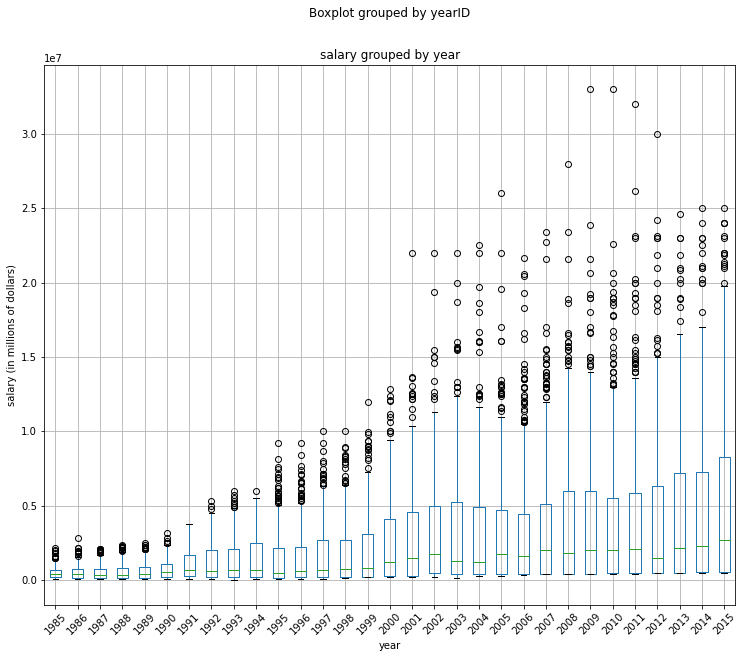

In [19]:
batting_salaries.boxplot(column='salary',by='yearID',figsize=(12,10))
plt.ylabel('salary (in millions of dollars)')
plt.xlabel('year')
plt.title('salary grouped by year')
plt.xticks(rotation=45)
plt.show()

 These boxplots indicates that there is a general increase in salaries as years increase. Furthermore, the range of the data increases as time passes, resulting in larger boxes with more dispersed whiskers. In addition, as time passes, the outliers become more extreme. In 1985, the outliers are not far from the boxplot. In 2009 and 2010, the most extreme outlier is a player who gets paid around 14 times than the median salary in the league. Looking more closely, we see that the median salary has steadily increased over time, but it looks like the salary increase of the upper quartile (the top 25%) has increased exponentially in comparison.

Similar to the previous boxplots, we used boxplots that looked at OPS grouped by year in order to look at the distribution of OPS for each year in our dataset.


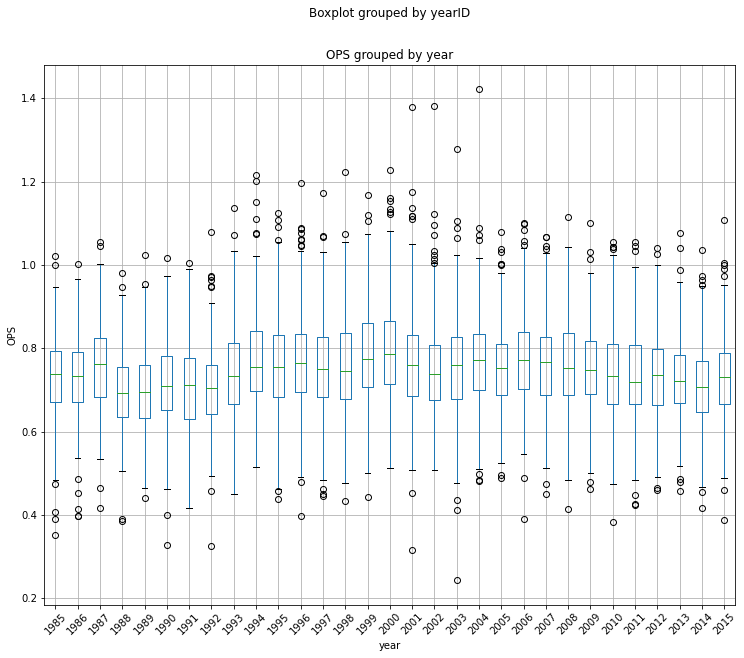

In [20]:
batting_salaries.boxplot(column='OPS',by='yearID',figsize=(12,10))
plt.ylabel('OPS')
plt.xlabel('year')
plt.title('OPS grouped by year')
plt.xticks(rotation=45)
plt.show()

These boxplots indicate that the median OPS across 1985-2015 generally stay consistent. In addition, The other quartiles and range of OPS does not vary that much either. Our finding makes sense because on average, baseball batting performance shouldn't drastically increase or decrease by year unless there are changes in the rules of the actual game. We expect these outliers because there are always players who exceed league standards. We looked at an outlier in 2004 to double check that our boxplot data was correct. The outlier is Barry Bonds, who had one of the greatest seasons in baseball history with his 1.422 OPS in 2004 which confirms our boxplots.

In [21]:
batting[batting['OPS'] > 1.4] 

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SF,OPS
84759,bondsba01,2004,SFN,147,373.0,129.0,135.0,27.0,3.0,45.0,101.0,232.0,41.0,9.0,3.0,1.421733


_Conclusion on boxplots:_ The 'Salary grouped by year' boxplot that shows that there is a general increase in salaries as the years become more recent. Furthermore, the spread of the data increases as time passes, resulting in larger boxes with more dispersed whiskers.  The ‘OPS grouped by year’ boxplot shows seemingly consistent data with similar spreads regardless of the year which is probably due to it being an average index for hitters that measure the player’s performance; and it would make sense that it stays mostly constant with new and old players.

To continue our EDA, we aimed to create a scatterplot that plotted median and mean salaries against each year.

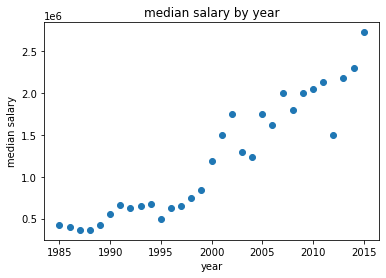

The correlation between year and median salary is 0.94.


In [27]:
median_salary = batting_salaries.groupby('yearID').median()['salary'].reset_index()
plt.scatter(median_salary['yearID'],median_salary['salary'])
plt.ylabel('median salary')
plt.xlabel('year')
plt.title('median salary by year')
plt.show()

print('The correlation between year and median salary is {:.2f}.'.format(median_salary['yearID'].corr(median_salary['salary'])))

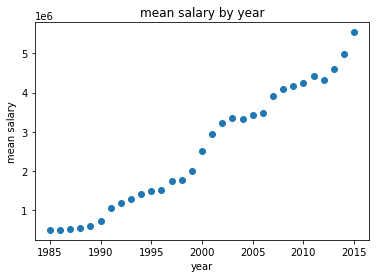

The correlation between year and mean salary is 0.99.


In [28]:
mean_salary = batting_salaries.groupby('yearID').mean()['salary'].reset_index()
plt.scatter(mean_salary['yearID'],mean_salary['salary'])
plt.ylabel('mean salary')
plt.xlabel('year')
plt.title('mean salary by year')
plt.show()

print('The correlation between year and mean salary is {:.2f}.'.format(mean_salary['yearID'].corr(mean_salary['salary'])))

We observed that both scatterplots depicted a positive relationship between salary (median and mean) and year. This makes sense because looking at our boxplots, there was a general increase in median across the years we are observing (1985-2015). Specifically, the correlation between median salary and year is .94 and the correlation between mean salary and year is .99, indicating a very strong positive relationship.

We also plotted the median OPS of players against individual years. 

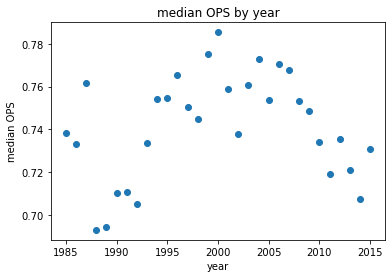

The correlation between year and median OPS is 0.16.


In [29]:
median_ops = batting_salaries.groupby('yearID').median()['OPS'].reset_index()
plt.scatter(median_ops['yearID'],median_ops['OPS'])
plt.ylabel('median OPS')
plt.xlabel('year')
plt.title('median OPS by year')
plt.show()

print('The correlation between year and median OPS is {:.2f}.'.format(median_ops['yearID'].corr(median_ops['OPS'])))

Finally, we did the same thing with the mean OPS. 

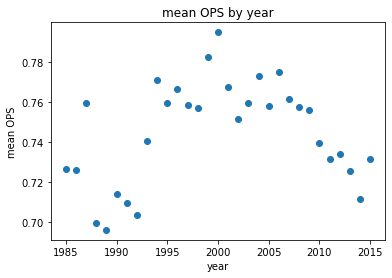

The correlation between year and mean OPS is 0.21.


In [30]:
mean_ops = batting_salaries.groupby('yearID').mean()['OPS'].reset_index()
plt.scatter(mean_ops['yearID'],mean_ops['OPS'])
plt.ylabel('mean OPS')
plt.xlabel('year')
plt.title('mean OPS by year')
plt.show()

print('The correlation between year and mean OPS is {:.2f}.'.format(mean_ops['yearID'].corr(mean_ops['OPS'])))

Looking at the both OPS scatterplots, there doesn't appear to be a clear relationship between year and OPS. This makes sense because the boxplots we observed showed that the median generally stayed the same across the years we're observing (1985-2015). More specifically, the correlation between median OPS and year is 0.16 while the correlation between mean OPS and year is .21. This is a very weak positive relationship. We also note that there doesn't seem to be a linear relationship in either OPS scatterplots.

_Conclusion on scatterplots:_ The median salary v. year and mean salary v. year scatterplots showed an upward trend as time passes. The mean and median OPS by year scatterplots showed no clear trend showing little to no relationship between OPS and year.

After plotting the means and medians of player OPS and Salary, we wanted to analyze how some individual teams paid their players based on OPS because we know some teams have more funding than other teams. Thus, we created scatter plots to see the mean salaries of four teams per year. We chose mean salary over median salary because our previous correlation findings indicate that the relationship between mean salary and year is stronger (.99 > .94).

We used data from post 1998, as that was when the last team currently in the MLB was added. We chose the Yankees for their consistent ranking as the most valuable baseball franchise. We chose the Marlins, Rays, and Pirates as they have all taken turns being the least valuable baseball franchise during our time period of 1998 - 2015. 

More specifically, we chose these teams because the Yankees have been the highest-valued team from 2000 to 2015 and the lowest-valued teams have alternated between the Tampa Bay Rays, Pittsburgh Pirates, and Miami Marlins (min. 2 years each during this span)([Source](https://www.google.com/url?q=https://law.marquette.edu/assets/sports-law/pdf/Values%2520Report%252016.pdf&sa=D&source=docs&ust=1634580732849000&usg=AOvVaw18Y8kJinut3DJkSW7FDh6k)).

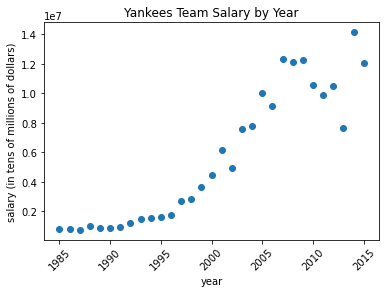

The correlation between year and the Yankees' mean salary is 0.93.


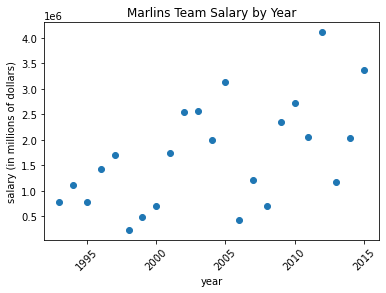

The correlation between year and the Marlins' mean salary is 0.54.


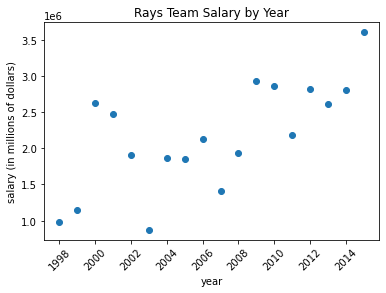

The correlation between year and the Rays' mean salary is 0.70.


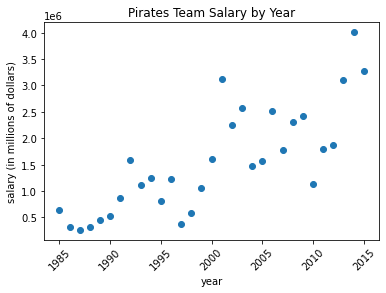

The correlation between year and the Pirates' mean salary is 0.80.


In [31]:
# Yankees
yankeeSalary = batting_salaries.loc[:,['salary','teamID','yearID']]
yankeeSalary = yankeeSalary[yankeeSalary['teamID'] == 'NYA']
meanYankeeSalary = yankeeSalary.groupby('yearID').mean().reset_index()

plt.scatter(mean_salary['yearID'].unique(), meanYankeeSalary['salary'])
plt.ylabel('salary (in tens of millions of dollars)')
plt.xlabel('year')
plt.title('Yankees Team Salary by Year')
plt.xticks(rotation=45)
plt.show()

print('The correlation between year and the Yankees\' mean salary is {:.2f}.'.format(meanYankeeSalary['yearID'].corr(meanYankeeSalary['salary'])))

#Marlins
marlinsSalary = batting_salaries.loc[:,['salary','teamID','yearID']]
marlinsSalary = marlinsSalary[marlinsSalary['teamID'] == 'MIA']
meanMarlinsSalary = marlinsSalary.groupby('yearID').mean().reset_index()

plt.scatter(marlinsSalary['yearID'].unique(), meanMarlinsSalary['salary'])
plt.ylabel('salary (in millions of dollars)')
plt.xlabel('year')
plt.title('Marlins Team Salary by Year')
plt.xticks(rotation=45)
plt.show()

print('The correlation between year and the Marlins\' mean salary is {:.2f}.'.format(meanMarlinsSalary['yearID'].corr(meanMarlinsSalary['salary'])))

#Rays
raysSalary = batting_salaries.loc[:,['salary','teamID','yearID']]
raysSalary = raysSalary[raysSalary['teamID'] == 'TBA']
meanRaysSalary = raysSalary.groupby('yearID').mean().reset_index()

plt.scatter(raysSalary['yearID'].unique(), meanRaysSalary['salary'])
plt.ylabel('salary (in millions of dollars)')
plt.xlabel('year')
plt.title('Rays Team Salary by Year')
plt.xticks(rotation=45)
plt.locator_params(axis='x',nbins=10) # to prevent decimals on x-axis ticks
plt.show()

print('The correlation between year and the Rays\' mean salary is {:.2f}.'.format(meanRaysSalary['yearID'].corr(meanRaysSalary['salary'])))

#Pirates
piratesSalary = batting_salaries.loc[:,['salary','teamID','yearID']]
piratesSalary = piratesSalary[piratesSalary['teamID'] == 'PIT']
meanPiratesSalary = piratesSalary.groupby('yearID').mean().reset_index()

plt.scatter(piratesSalary['yearID'].unique(), meanPiratesSalary['salary'])
plt.ylabel('salary (in millions of dollars)')
plt.xlabel('year')
plt.title('Pirates Team Salary by Year')
plt.xticks(rotation=45)
plt.show()

print('The correlation between year and the Pirates\' mean salary is {:.2f}.'.format(meanPiratesSalary['yearID'].corr(meanPiratesSalary['salary'])))

_Conclusion on team scatterplots:_ The mean team salary of the Yankees and Pirates show a relatively strong positive trend against year. The mean team salaries of the Rays and Marlins also show a positive trend against year but the correlation is less strong. Specifically, the correlation between the Yankees' mean salary and year is .93, the correlation between the Pirates' mean salary and year is .80, the correlation between the Rays' mean salary and year is .70, the correlation between the Marlins' mean salary and year is .54. These trends make sense because as we've seen in general, the mean salary across all of the MLB has increased as years increased. In addition, we noted that the Yankees y-axis is in the tens of millions of dollars, while the other teams y-axis is in the millions of dollars. We observed that the Yankees' correlation was the strongest and they are one of the most well-funded teams in the MLB.

From visualizations like boxplots and scatterplots, we observed some discernible trends in salaries.

To look at the relationship between salary and batting statistics, we created a linear regression model so that we could identify which batting statistics are significantly related to salary. We used alpha = 0.05 as our threshold to determine which statistics are significant.

We started off by adding new columns in our dataset that calculates the rate of HRs, RBIs, SOs, Hs, BBs, SFs per at bat for each player because players do not have the same number of ABs per season. We also added a new column R Rate which represents the runs per game a player had that regular season.

We specifically chose to add the rate of these batting statistics over other batting statistics because we predict that stats such as Hs (hits) and RBIs (runs batted in) will be significant (p value <= .05), while stats such as BBs (balls) and SFs (sacrifice flys) will not be significant (p value > .05).

In [32]:
batting_salaries['RBI Rate'] = batting_salaries['RBI']/batting_salaries['AB'] # number of RBIs per AB
batting_salaries['HR Rate'] = batting_salaries['HR']/batting_salaries['AB'] # number of homeruns per at bat
batting_salaries['SO Rate'] = batting_salaries['SO']/batting_salaries['AB']
batting_salaries['H Rate'] = batting_salaries['H']/batting_salaries['AB']
batting_salaries['R Rate'] = batting_salaries['R']/batting_salaries['G']
batting_salaries['BB Rate'] = batting_salaries['BB']/batting_salaries['AB']
batting_salaries['SF Rate'] = batting_salaries['SF']/batting_salaries['AB']

In [28]:
# linear regression tool
import statsmodels.api as sm

y = batting_salaries['salary']
x = batting_salaries.drop(['salary','playerID','yearID','teamID','2B','3B','BB','SO','HBP','SF','HR','RBI','SO','H','R','AB'], axis=1)
x = sm.add_constant(x)
lin_reg_model = sm.OLS(y,x).fit()
lin_reg_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          2.96e-312
Time:                        21:30:25   Log-Likelihood:            -1.5290e+05
No. Observations:                9260   AIC:                         3.058e+05
Df Residuals:                    9250   BIC:                         3.059e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.452e+05   4.33e+05     -1.028      0.304   -1.29e+06    4.04e+05
G           6222.5682   1442.380      4.314      0.000    3395.185    9049.951
OPS        -1.183e+07   2.24e+06     -5.283      0.000   -1.62e+07   -7.44e+06
RBI Rate     8.23e+06   1.84e+06      4.464      0.000    4.62e+06    1.18e+07
HR Rate     5.448e+07   7.14e+06      7.628      0.000    4.05e+07    6.85e+07
SO Rate    -1.885e+06   7.48e+05     -2.520      0.012   -3.35e+06   -4.18e+05
H Rate      1.894e+07   4.95e+06      3.829      0.000    9.25e+06    2.86e+07
R Rate      6.152e+06   3.74e+05     16.437      0.000    5.42e+06    6.89e+06
BB Rate     1.148e+07   1.54e+06      7.464      0.000    8.47e+06    1.45e+07
SF Rate     2.134e+06   7.35e+06      0.290      0.772   -1.23e+07    1.66e+07
==============================================================================
Omnibus:                     4887.853   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36539.509
Skew:                           2.460   Prob(JB):                         0.00
Kurtosis:                      11.396   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_Conclusion on linear regression:_

Observing our results of the linear regression, we can observe the 'P>|t|' column to look at our p-values. The significant statistics are G (games), OPS (on-base plus slugging), RBI (runs batted in) Rate, HR (homerun) Rate, H (hits) Rate, R (runs) Rate, and BB (walks) Rate at the .05 level. The SO Rate (strikeout) and SF Rate (sacrifice fly) were not significant at the .05 level. 

As expected, the rate of sacrifice flies a player produces during a season is not significantly related to their salary. This intuitively makes sense because in general, a player isn't well-known if they hit a lot of sacrifice flys. In addition, looking at the OPS equation we know that sacrifice flys do not increase a player's OPS. Surprisingly, BB Rate (walks) is significantly related. However, we realized this makes sense because a player is on-base after they get walked, thus contributing to an increase in their OPS.

SO Rate (strikeouts) had a p-value of .012 which was not significant according to our significance level. This makes sense because some players may have a high strikeout rate compared to other players but still manage to produce the same or better amount of hitting production.

G (games per season) is potentially signficantly related to salary because players who play more games in the season are the main players and starters of the team.

Since we found that RBI Rate, HR Rate, H Rate, and BB Rate are all significantly related to salary, it follows that OPS is also signficant because RBIs, HRs, Hs, and BBs all play a part in increasing OPS.

R Rate (runs) is significant potentially because a player must be on-base at some point for them to have scored a run for their team, and we found that OPS is significant.

## **Questions for reviewers**

* What are some other ways we could try and visualize the relationship between baseball player batting statistics and their salaries?

* What are some potential conclusion mistakes we could avoid from our exploratory data analysis?

* What are some common mistakes when analyzing sports data?
